Data Relationships in Pandas

---

#### 1. **One-to-One Relationship**

A one-to-one relationship occurs when each row in one dataset corresponds to exactly one row in another dataset.

##### Example:
You have two datasets:
- One with `EmployeeID` and their `Name`.
- Another with `EmployeeID` and their `Email`.



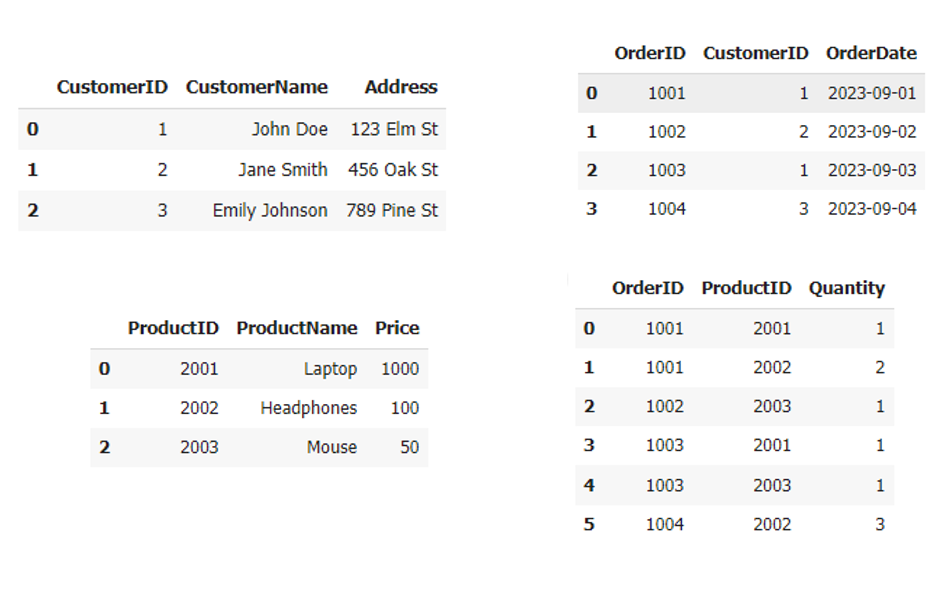

In [1]:
import pandas as pd

# Employee Info (One-to-One)
employee_data = {
    'EmployeeID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie']
}
df_employee = pd.DataFrame(employee_data)
df_employee



,EmployeeID,Name
0,101,Alice
1,102,Bob
2,103,Charlie


In [2]:
# Employee Emails (One-to-One)
email_data = {
    'EmployeeID': [101, 102, 103],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com']
}
df_email = pd.DataFrame(email_data)
df_email

,EmployeeID,Email
0,101,alice@example.com
1,102,bob@example.com
2,103,charlie@example.com


#### 2. **One-to-Many Relationship**

In a one-to-many relationship, each record in one dataset can relate to multiple records in another dataset.

##### Example:
You have a dataset of `Customers` and another dataset of `Orders`. Each customer can place multiple orders.



In [9]:

# Customer Info (One-to-Many)
customer_data = {
    'CustomerID': [1, 2],
    'CustomerName': ['John', 'Jane']
}
df_customers = pd.DataFrame(customer_data)
df_customers


,CustomerID,CustomerName
0,1,John
1,2,Jane


In [11]:
# Orders (One-to-Many)
order_data = {
    'OrderID': [101, 102, 103, 104],
    'CustomerID': [1, 2, 1, 2],
    'OrderTotal': [250, 450, 150, 300]
}
df_orders = pd.DataFrame(order_data)
df_orders


,OrderID,CustomerID,OrderTotal
0,101,1,250
1,102,2,450
2,103,1,150
3,104,2,300


#### 3. **Many-to-Many Relationship**

In a many-to-many relationship, multiple records in one dataset can relate to multiple records in another dataset. This requires an intermediary or "junction" table.

##### Example:
You have datasets of `Students` and `Courses`, where each student can enroll in multiple courses, and each course can have multiple students.




In [12]:
# Students (Many-to-Many)
students_data = {
    'StudentID': [1, 2],
    'StudentName': ['Alice', 'Bob']
}
df_students = pd.DataFrame(students_data)
df_students

,StudentID,StudentName
0,1,Alice
1,2,Bob


In [13]:
# Courses (Many-to-Many)
courses_data = {
    'CourseID': [201, 202],
    'CourseName': ['Math', 'Science']
}
df_courses = pd.DataFrame(courses_data)
df_courses

,CourseID,CourseName
0,201,Math
1,202,Science


In [14]:
# Enrollment (Junction Table for Many-to-Many)
enrollment_data = {
    'StudentID': [1, 1, 2, 2],
    'CourseID': [201, 202, 201, 202]
}
df_enrollment = pd.DataFrame(enrollment_data)
df_enrollment

,StudentID,CourseID
0,1,201
1,1,202
2,2,201
3,2,202


In [15]:

# Merge datasets using EmployeeID (one-to-one)
df_merged_one_to_one = pd.merge(df_employee, df_email, on='EmployeeID')

df_merged_one_to_one

,EmployeeID,Name,Email
0,101,Alice,alice@example.com
1,102,Bob,bob@example.com
2,103,Charlie,charlie@example.com


In [16]:
# Merge datasets using CustomerID (one-to-many)
df_merged_one_to_many = pd.merge(df_customers, df_orders, on='CustomerID')
df_merged_one_to_many

,CustomerID,CustomerName,OrderID,OrderTotal
0,1,John,101,250
1,1,John,103,150
2,2,Jane,102,450
3,2,Jane,104,300


In [17]:
# Merge Students with Enrollment
df_student_courses = pd.merge(df_students, df_enrollment, on='StudentID')

# Merge with Courses
df_merged_many_to_many = pd.merge(df_student_courses, df_courses, on='CourseID')

df_merged_many_to_many

,StudentID,StudentName,CourseID,CourseName
0,1,Alice,201,Math
1,2,Bob,201,Math
2,1,Alice,202,Science
3,2,Bob,202,Science


### **Sample Data**
We will use two simple tables, **Customers** and **Orders**, to demonstrate each type of join.



In [18]:
#### **Customers Table**

import pandas as pd

# Sample Customers Table
customers_data = {
    'CustomerID': [1, 2, 3, 4],
    'CustomerName': ['Alice', 'Bob', 'Charlie', 'David']
}
df_customers = pd.DataFrame(customers_data)

df_customers



,CustomerID,CustomerName
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David


In [19]:
#### **Orders Table**

# Sample Orders Table
orders_data = {
    'OrderID': [101, 102, 103, 104],
    'CustomerID': [2, 4, 1, 5],
    'OrderAmount': [250, 300, 150, 400]
}
df_orders = pd.DataFrame(orders_data)
df_orders

,OrderID,CustomerID,OrderAmount
0,101,2,250
1,102,4,300
2,103,1,150
3,104,5,400


### **1. Inner Join**
- **Definition**: Keeps only rows with matching `CustomerID` in both datasets.




In [20]:

# Inner Join
inner_join = pd.merge(df_customers, df_orders, on='CustomerID', how='inner')
inner_join




,CustomerID,CustomerName,OrderID,OrderAmount
0,1,Alice,103,150
1,2,Bob,101,250
2,4,David,102,300


In [23]:
df_customers_indexed = df_customers.set_index('CustomerID')
df_orders_indexed = df_orders.set_index('CustomerID')

# Use the join method to join the two DataFrames
df_customers_indexed.join(df_orders_indexed, how='inner')


,CustomerName,OrderID,OrderAmount
CustomerID,,,
1,Alice,103,150
2,Bob,101,250
4,David,102,300


- **Explanation**: Only customers with orders (matching `CustomerID`) are kept. Charlie (CustomerID 3) and the order with CustomerID 5 are excluded.


### **2. Left Join**
- **Definition**: Keeps all data from the **left** table (`Customers`), and fills in data from the right table (`Orders`). If there is no match, missing values are filled with `NaN`.




In [24]:
# Left Join
left_join = pd.merge(df_customers, df_orders, on='CustomerID', how='left')
left_join


,CustomerID,CustomerName,OrderID,OrderAmount
0,1,Alice,103.0,150.0
1,2,Bob,101.0,250.0
2,3,Charlie,NaN,NaN
3,4,David,102.0,300.0


In [25]:
df_customers_indexed = df_customers.set_index('CustomerID')
df_orders_indexed = df_orders.set_index('CustomerID')

# Use the join method to join the two DataFrames
df_customers_indexed.join(df_orders_indexed, how='left')

,CustomerName,OrderID,OrderAmount
CustomerID,,,
1,Alice,103.0,150.0
2,Bob,101.0,250.0
3,Charlie,NaN,NaN
4,David,102.0,300.0


### **3. Right Join**
- **Definition**: Keeps all data from the **right** table (`Orders`), and fills in data from the left table (`Customers`). If there is no match, missing values are filled with `NaN`.

In [27]:
# Right Join
right_join = pd.merge(df_customers, df_orders, on='CustomerID', how='right')
right_join

,CustomerID,CustomerName,OrderID,OrderAmount
0,2,Bob,101,250
1,4,David,102,300
2,1,Alice,103,150
3,5,NaN,104,400


In [28]:
df_customers_indexed = df_customers.set_index('CustomerID')
df_orders_indexed = df_orders.set_index('CustomerID')

# Use the join method to join the two DataFrames
df_customers_indexed.join(df_orders_indexed, how='right')

,CustomerName,OrderID,OrderAmount
CustomerID,,,
2,Bob,101,250
4,David,102,300
1,Alice,103,150
5,NaN,104,400


### **4. Outer Join**
- **Definition**: Keeps all rows from both tables, filling in missing values where there is no match.



In [29]:
# Outer Join
outer_join = pd.merge(df_customers, df_orders, on='CustomerID', how='outer')
outer_join

,CustomerID,CustomerName,OrderID,OrderAmount
0,1,Alice,103.0,150.0
1,2,Bob,101.0,250.0
2,3,Charlie,NaN,NaN
3,4,David,102.0,300.0
4,5,NaN,104.0,400.0


In [30]:
df_customers_indexed = df_customers.set_index('CustomerID')
df_orders_indexed = df_orders.set_index('CustomerID')

# Use the join method to join the two DataFrames
df_customers_indexed.join(df_orders_indexed, how='outer')

,CustomerName,OrderID,OrderAmount
CustomerID,,,
1,Alice,103.0,150.0
2,Bob,101.0,250.0
3,Charlie,NaN,NaN
4,David,102.0,300.0
5,NaN,104.0,400.0


### **Lab Assignment 8: Joining Tables**

#### **Objective:**
In this lab, you will work with datasets and learn how to join tables using different types of joins in Pandas, including **Inner**, **Left**, **Right**, and **Outer** joins. Additionally, you will classify the relationships between the tables as **One-to-One**, **One-to-Many**, or **Many-to-Many**.

---

### **Part 1: Data for Joining**

You are given three datasets: **Students**, **Courses**, and **Enrollments**. Each student can enroll in multiple courses, and each course can have multiple students. You'll perform various join operations and analyze the resulting data.

#### **Dataset 1: Students**
Each student is uniquely identified by their `StudentID`.

```python
students_data = {
    'StudentID': [1, 2, 3, 4, 5],
    'StudentName': ['Alice Johnson', 'Bob Smith', 'Charlie Brown', 'Diana Prince', 'Eva Martinez'],
    'Major': ['Computer Science', 'Mathematics', 'Physics', 'Biology', 'Computer Science']
}
df_students = pd.DataFrame(students_data)
```

#### **Dataset 2: Courses**
Each course is identified by `CourseID`.

```python
courses_data = {
    'CourseID': ['CS101', 'MATH201', 'PHYS101', 'BIO150', 'CS201', 'STAT101'],
    'CourseName': ['Intro to Programming', 'Calculus II', 'General Physics', 'Biology Fundamentals', 'Data Structures', 'Statistics'],
    'Credits': [3, 4, 4, 3, 3, 3],
    'Instructor': ['Dr. Lee', 'Dr. Garcia', 'Dr. Newton', 'Dr. Darwin', 'Dr. Turing', 'Dr. Fisher']
}
df_courses = pd.DataFrame(courses_data)
```

#### **Dataset 3: Enrollments**
Each enrollment links a student to a course and includes their grade.

```python
enrollments_data = {
    'EnrollmentID': [1, 2, 3, 4, 5, 6, 7, 8],
    'StudentID': [1, 1, 2, 3, 3, 4, 5, 2],
    'CourseID': ['CS101', 'MATH201', 'CS101', 'PHYS101', 'BIO150', 'BIO150', 'CS101', 'STAT101'],
    'Grade': ['A', 'B+', 'B', 'A-', 'B+', 'A', 'A-', 'C+']
}
df_enrollments = pd.DataFrame(enrollments_data)
```

#### **Dataset 4: Student Contact Info**
Additional contact information for some students (not all students have contact info).

```python
contact_data = {
    'StudentID': [1, 3, 4, 6],  # Note: Student 6 doesn't exist in students table
    'Phone': ['555-0123', '555-0789', '555-0456', '555-0999'],
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Rd', '321 Elm St']
}
df_contact = pd.DataFrame(contact_data)
```

---

### **Part 2: Joining Tables**

#### **Task 1: Inner Joins**
1. Perform an **Inner Join** between `df_students` and `df_enrollments` on `StudentID`. This will show only students who are enrolled in at least one course.

2. Create a comprehensive view by joining `df_students`, `df_enrollments`, and `df_courses` to show each student's enrollment details with course information. Use the result from step 1 and join it with `df_courses` on `CourseID`.

#### **Task 2: Left Joins**
3. Perform a **Left Join** between `df_students` and `df_enrollments`. This will keep all students, even those who haven't enrolled in any courses.

4. Perform a **Left Join** between `df_students` and `df_contact` to show all students with their contact information (if available).

#### **Task 3: Right Joins**
5. Perform a **Right Join** between `df_students` and `df_contact`. This will show all contact records, even if there's no matching student.

6. Perform a **Right Join** between `df_enrollments` and `df_courses` to show all courses, including those with no enrollments.

#### **Task 4: Outer Joins**
7. Perform a **Full Outer Join** between `df_students` and `df_contact` to see all students and all contact records, regardless of whether they match.

8. Perform a **Full Outer Join** between `df_courses` and `df_enrollments` to see all courses and all enrollments, even if some courses have no students or some enrollments reference non-existent courses.

---

### **Part 3: Analysis Questions**

After completing the joins, answer the following questions by examining your results:

#### **Relationship Classification:**
1. What type of relationship exists between `Students` and `Enrollments`? (One-to-One, One-to-Many, or Many-to-Many) Provide evidence from your join results.

2. What type of relationship exists between `Students` and `Courses` through the `Enrollments` table? Explain your reasoning.

3. What type of relationship exists between `Students` and `Contact Info`? Support your answer with examples from the data.

#### **Data Analysis Questions:**
4. Which students are not enrolled in any courses? (Use your Left Join result)

5. Which courses have no enrolled students? (Use your Right Join result)

6. How many total credits is each student taking? (Calculate using the comprehensive join from Task 1.2)

7. What happens when you try to join tables with mismatched data (like the contact info for Student 6)? Describe what you observe in the Outer Join results.

---

### **Part 4: Reflection**

Write a brief reflection (3-4 sentences) on:
- When you would use each type of join in real-world data analysis
- What challenges you encountered with mismatched or missing data
- How understanding table relationships helps in choosing the appropriate join type

---

### **Submission Requirements:**

Submit a Jupyter notebook containing:
1. All the join operations with clearly labeled results
2. Answers to all analysis questions in Part 3
3. Your reflection from Part 4
4. Well-commented code explaining each step

